In [2]:
import os
os.sys.path.append('../project_code')

from data.bhsa import book_sets, get_data
from markov.Markov_Chain import *
from PCA.PCA import * 
from Clustering.Clustering_analysis import *
from Distance.Distances import *

test = get_data(books=["lbh","sbh"])#
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

# Transitions

In [3]:
data = collections.defaultdict(dict)
for f in features:
    for d in domain:
        transMatrix = transitionMatrix(test[f][d], False) 
        #Here, transformations can be performed
        transDict = df_dict_Transformation(transMatrix)
        data[f][d] = pd.DataFrame(transDict).fillna(0)

In [4]:
data["phrase_functions"]["N"].head(10)

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
Adju->Adju,24.0,5.0,5.0,21.0,4.0,1.0,4.0,3.0,7.0,3.0,16.0,3.0,4.0,1.0,7.0
Adju->Cmpl,23.0,6.0,5.0,31.0,11.0,9.0,2.0,6.0,2.0,3.0,10.0,12.0,14.0,2.0,3.0
Adju->Conj,81.0,83.0,45.0,182.0,75.0,61.0,31.0,32.0,97.0,28.0,79.0,51.0,40.0,12.0,43.0
Adju->Exst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Frnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->IntS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Intj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Loca,1.0,2.0,0.0,10.0,4.0,2.0,0.0,0.0,3.0,1.0,1.0,4.0,2.0,0.0,0.0
Adju->ModS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Modi,0.0,2.0,0.0,3.0,5.0,1.0,0.0,0.0,5.0,1.0,2.0,2.0,1.0,0.0,1.0


In [5]:
stack_Data = stackTransitions(data, features, "N")

# Clustering


Distance measures: 'canberra', 'braycurtis', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'euclidean', 'sqeuclidean'

Clustering methods: 'average', 'centroid', 'complete', 'median', 'single', 'ward', 'weighted'

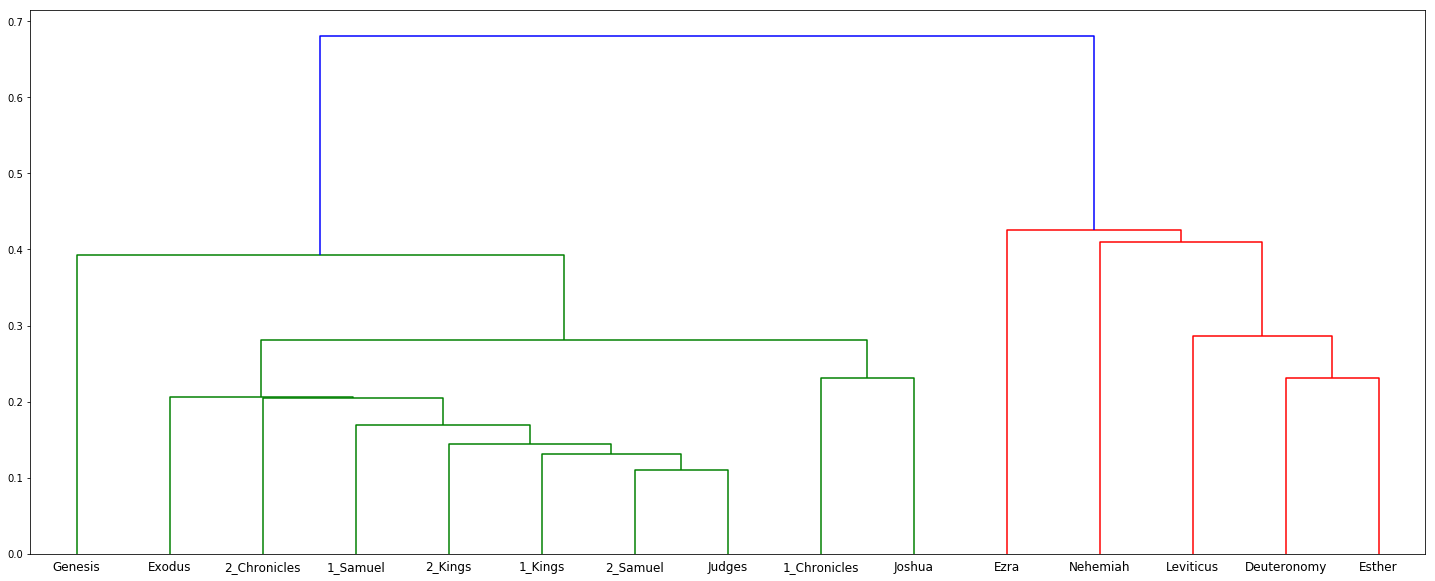

In [8]:
distancemetric = matrixDistances(data["phrase_functions"]["N"].T.values, "braycurtis")
Z = linkageFunction(distancemetric, "weighted")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

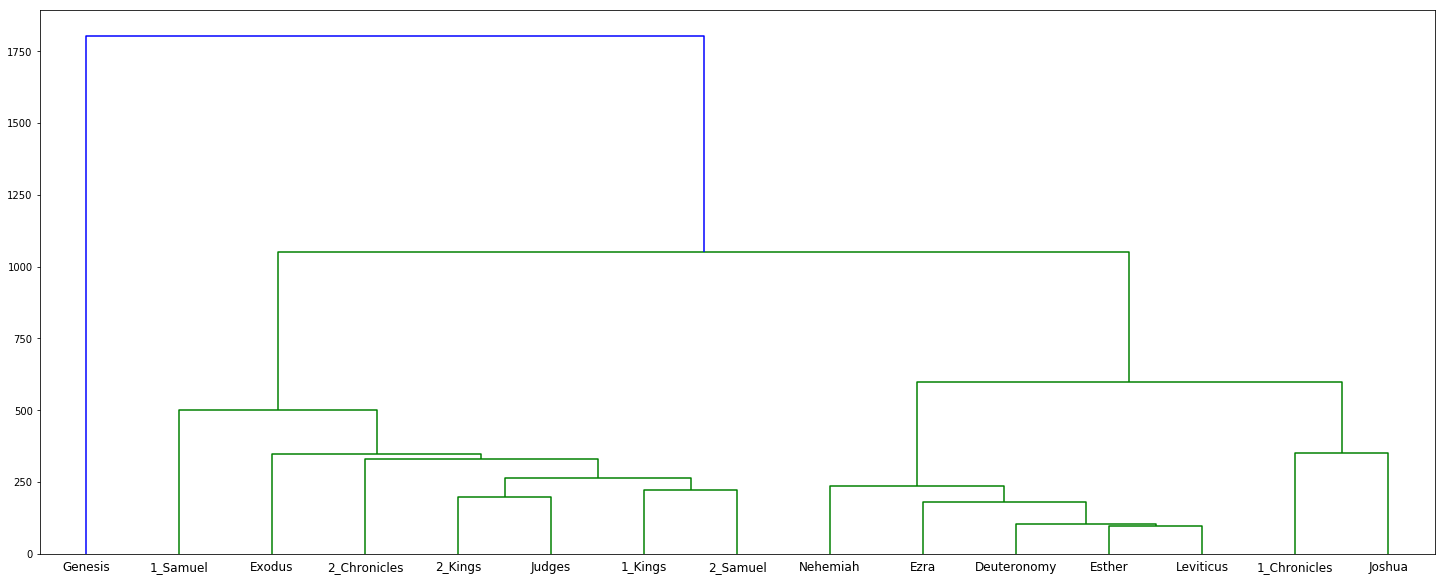

In [9]:
distancemetric = matrixDistances(data["phrase_functions"]["N"].T.values, "euclidean")
Z = linkageFunction(distancemetric, "average")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

In [16]:
nClusters = 4

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            if not data[f]["N"].empty:
                distancemetric = matrixDistances(data[f]["N"].T.values, metric)
                distancemetric = np.nan_to_num(distancemetric)
                Z = linkageFunction(distancemetric, method)
                flat = flattenClustering(Z, nClusters, "maxclust")
                tag = f+ "|" + metric +"|" +method
                results[tag] = flat

In [17]:
df_Results = pd.DataFrame(results, index = data["phrase_functions"]["N"].keys()).T
df_Results.head(10)

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
clause_types|braycurtis|average,1,1,1,1,1,1,3,4,1,2,1,1,1,3,2
clause_types|braycurtis|centroid,1,1,1,1,1,1,2,2,1,3,1,1,1,2,4
clause_types|braycurtis|complete,1,2,2,2,2,2,4,4,2,3,2,1,2,4,3
clause_types|braycurtis|median,1,1,1,1,1,1,1,1,1,2,3,1,1,1,1
clause_types|braycurtis|single,1,1,1,1,1,1,2,3,1,4,1,1,1,2,2
clause_types|braycurtis|ward,3,1,1,1,1,1,2,2,1,4,1,3,1,2,4
clause_types|braycurtis|weighted,3,1,1,1,1,1,2,2,1,4,1,3,1,2,3
clause_types|canberra|average,3,2,1,2,2,1,3,3,2,3,2,4,1,3,3
clause_types|canberra|centroid,1,1,2,4,1,1,1,1,1,1,1,3,1,1,1
clause_types|canberra|complete,3,1,2,1,1,2,3,3,2,3,1,4,2,3,3


In [18]:
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
pd.DataFrame(squareFormFunction(distancemetric), index = data["phrase_functions"]["N"].keys(),columns = data["phrase_functions"]["N"].keys())

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
1_Chronicles,0.000000,0.566964,0.816964,0.830357,0.580357,0.794643,0.718750,0.727679,0.790179,0.705357,0.883929,0.187500,0.794643,0.763393,0.732143
1_Kings,0.566964,0.000000,0.343750,0.321429,0.107143,0.299107,0.750000,0.816964,0.285714,0.924107,0.696429,0.419643,0.299107,0.794643,0.919643
1_Samuel,0.816964,0.343750,0.000000,0.250000,0.424107,0.053571,0.875000,0.821429,0.084821,0.986607,0.607143,0.669643,0.098214,0.875000,0.915179
2_Chronicles,0.830357,0.321429,0.250000,0.000000,0.383929,0.209821,0.879464,0.799107,0.178571,0.991071,0.575893,0.696429,0.214286,0.879464,0.892857
2_Kings,0.580357,0.107143,0.424107,0.383929,0.000000,0.375000,0.745536,0.816964,0.370536,0.919643,0.687500,0.437500,0.334821,0.790179,0.906250
2_Samuel,0.794643,0.299107,0.053571,0.209821,0.375000,0.000000,0.861607,0.808036,0.031250,0.973214,0.598214,0.656250,0.053571,0.861607,0.901786
Deuteronomy,0.718750,0.750000,0.875000,0.879464,0.745536,0.861607,0.000000,0.299107,0.861607,0.343750,0.883929,0.620536,0.861607,0.071429,0.419643
Esther,0.727679,0.816964,0.821429,0.799107,0.816964,0.808036,0.299107,0.000000,0.785714,0.424107,0.830357,0.687500,0.803571,0.325893,0.285714
Exodus,0.790179,0.285714,0.084821,0.178571,0.370536,0.031250,0.861607,0.785714,0.000000,0.973214,0.611607,0.651786,0.075893,0.861607,0.879464
Ezra,0.705357,0.924107,0.986607,0.991071,0.919643,0.973214,0.343750,0.424107,0.973214,0.000000,0.991071,0.794643,0.973214,0.339286,0.437500


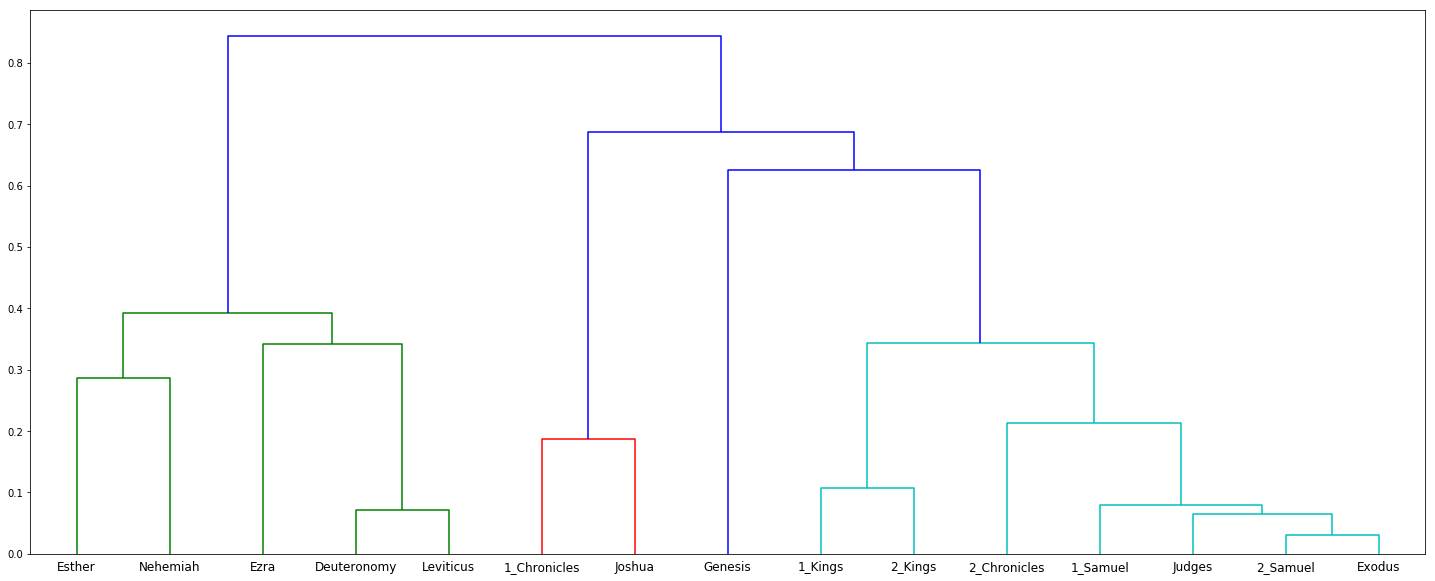

In [19]:
Z = linkageFunction(distancemetric, "average")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

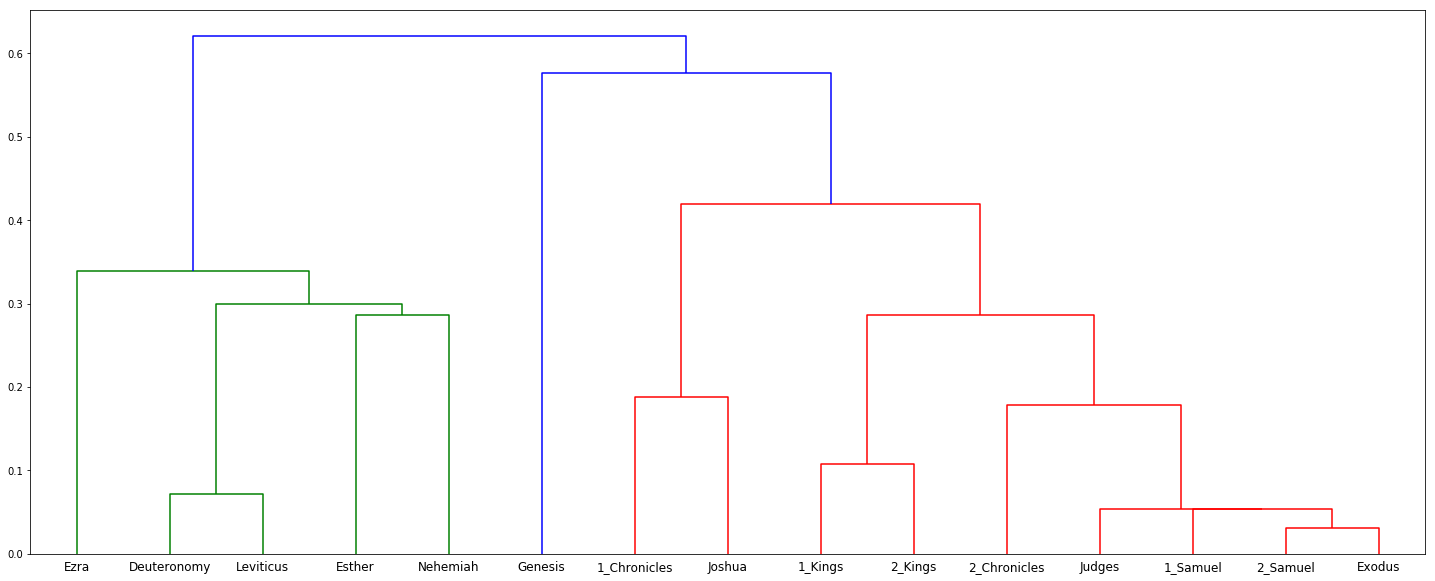

In [20]:
Z = linkageFunction(distancemetric, "single")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

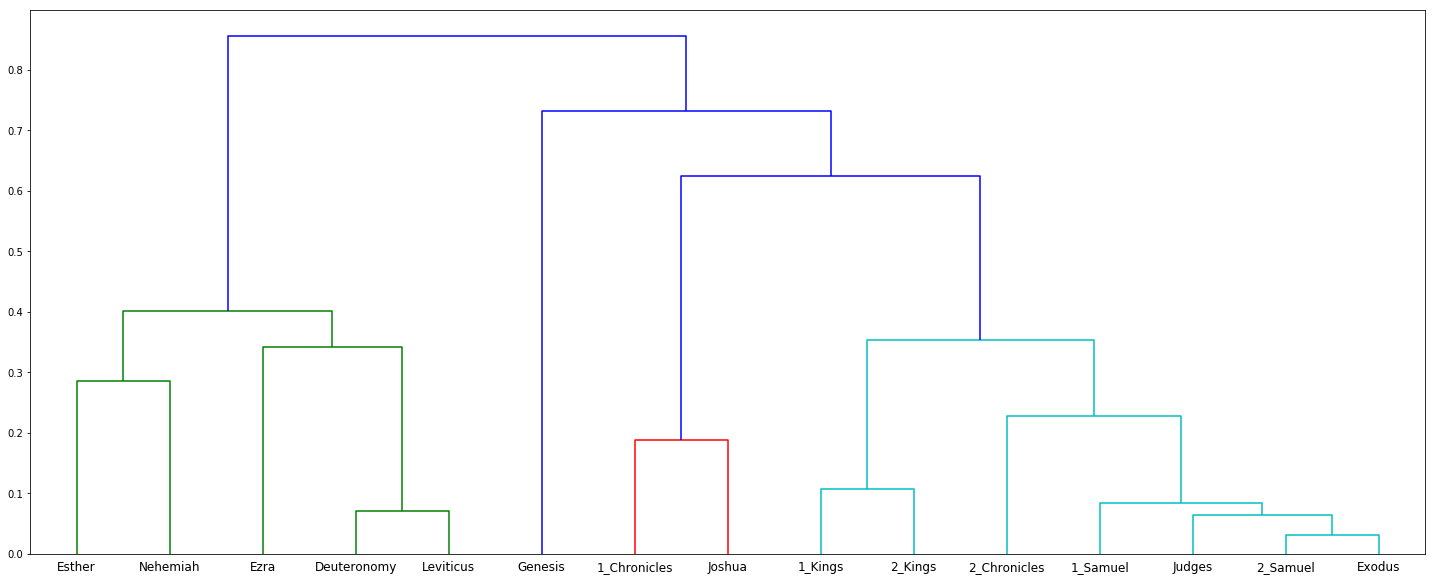

In [21]:
Z = linkageFunction(distancemetric, "weighted")
dendogramPlot(Z, data["phrase_functions"]["N"].keys())

# PCA

In [22]:
pca = PCA(n_components=2)

results_PCA = collections.defaultdict(lambda: collections.defaultdict(dict))
for f in features:
    for d in domain:
        if not data[f][d].empty:
            fit = pca.fit_transform(data[f][d].T.values) 
            results_PCA[f][d]["Fit"] = fit
            results_PCA[f][d]["var_Ratio"] = pca.explained_variance_ratio_

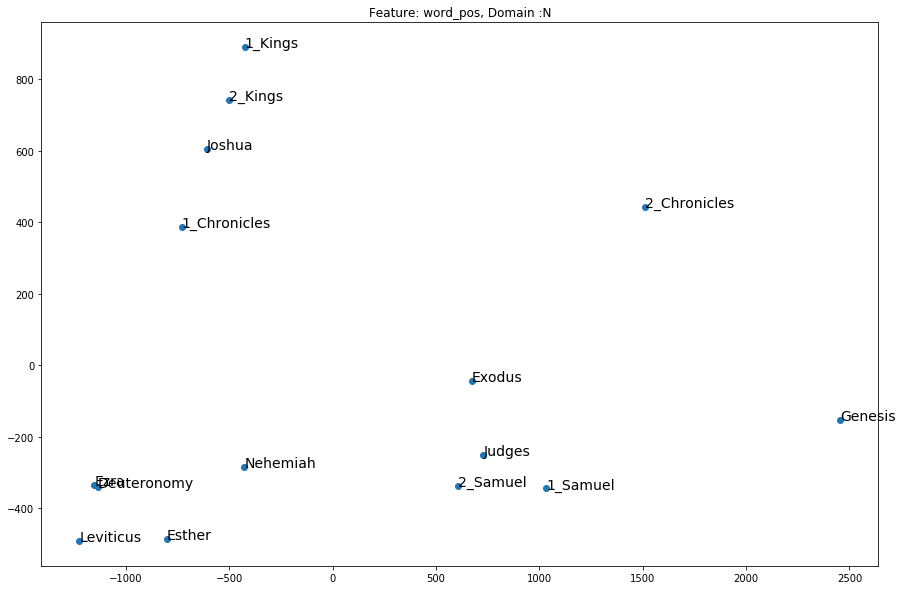

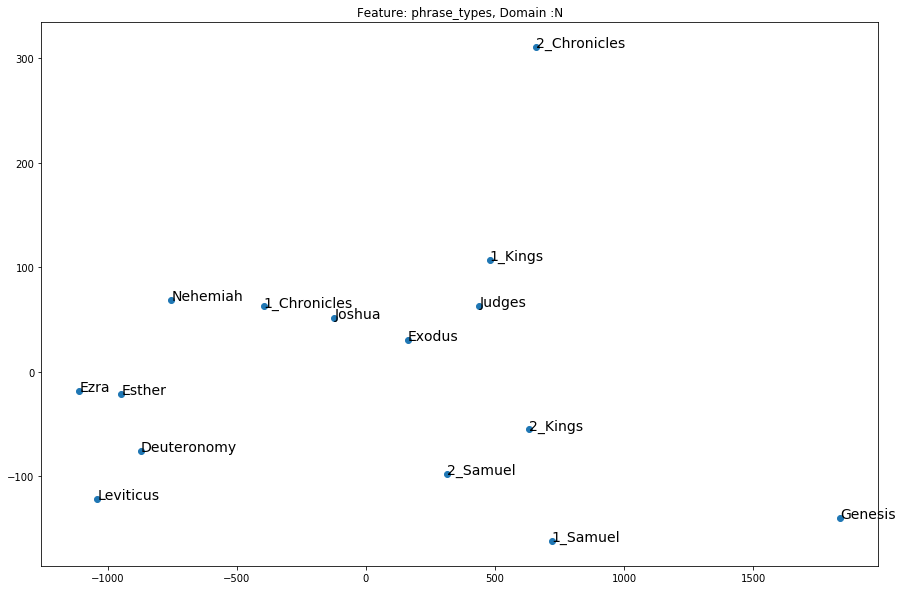

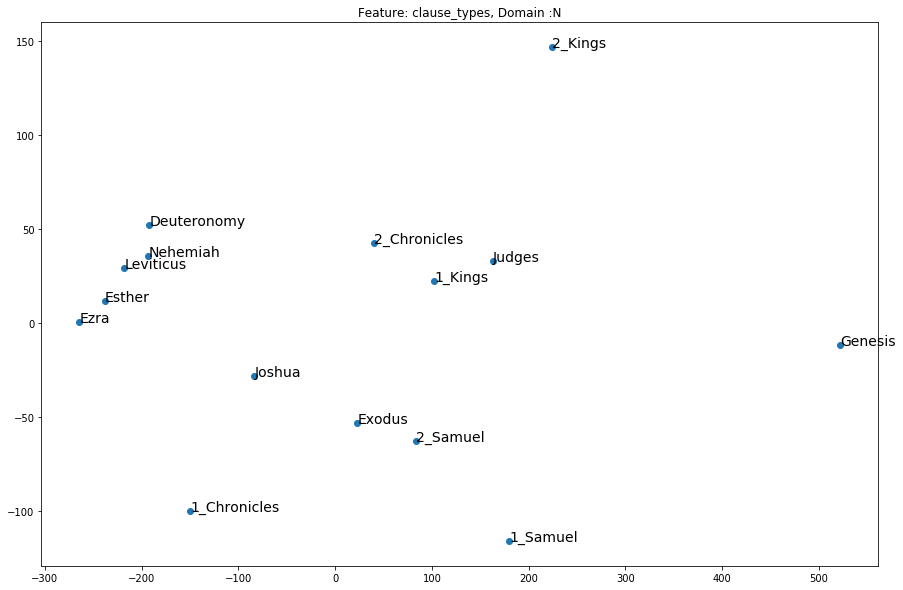

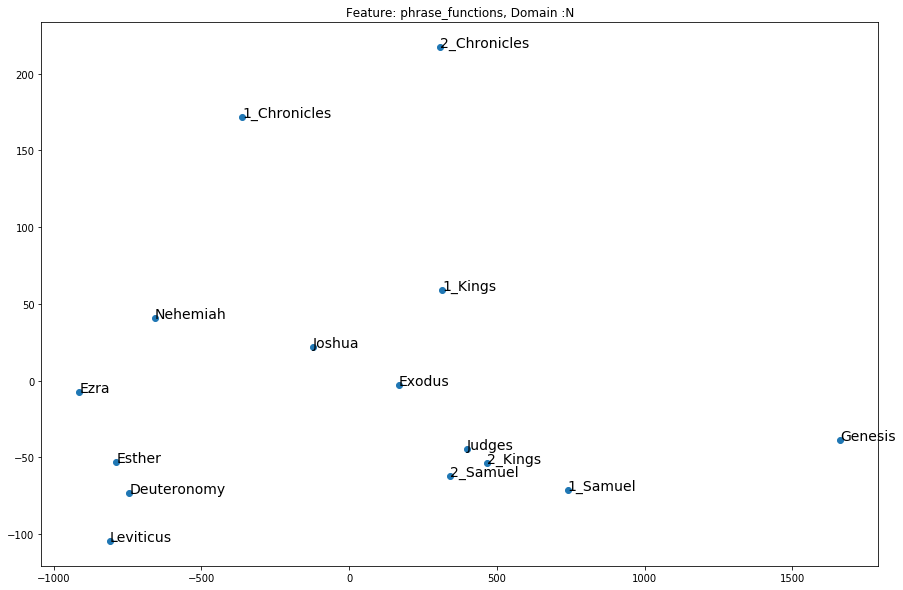

In [23]:
for f in features:
    for d in ["N"]:
        if len(results_PCA[f][d].keys())>0: 
            fit = results_PCA[f][d]["Fit"]
            plt.figure(1, figsize=(15, 10))     
            plt.scatter(fit[:, 0], fit[:, 1])
            books = data[f][d].keys()
            for i, book in enumerate(books):
                plt.annotate(book, xy=(fit[i, 0], fit[i, 1]), fontsize=14)
            plt.title("Feature: "+f+", Domain :"+d)
            plt.show()